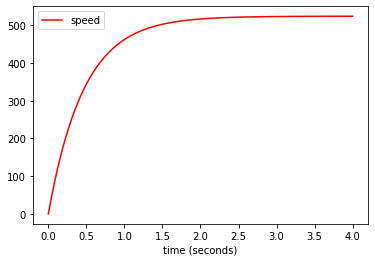

523.7286342967984


In [6]:
import sys
sys.path.append("../../")

import time
import math

from lib.data.dataplot import *
from lib.utils.time import *

class ElectricPart:

    def __init__(self, _R, _L):
        self.R = _R
        self.L = _L
        self.I = 0

    def evaluate(self, V, delta_t):
        self.I = (1 - self.R * delta_t / self.L) * self.I + (delta_t / self.L) * V
        return self.I


class TorqueToOmega:

    def __init__(self, _J, _b):
        self.J = _J
        self.b = _b
        self.w = 0

    def evaluate(self, T, delta_t):
        self.w = (1 - self.b * delta_t / self.J) * self.w + (delta_t / self.J) * T
        return self.w


class DCMotor:
    #
    # _R, resistance of the inductor
    # _L, impedence of the inductor
    # _Kt, torque coefficient
    # _Ke, BackEMF coefficient
    # _Wm, Wheel Mass
    # _Wr, Wheel Radius
    # _b, Friction coefficient
    #
    def __init__(self, _R, _L, _Kt, _Ke, _Wm, _Wr, _b):
        # inertial moment of the wheel
        _J = 0.5 * _Wm * _Wr**2
        # electric part
        self.electric = ElectricPart(_R, _L)
        # motion part
        self.torque_to_omega = TorqueToOmega(_J, _b)
        # other coefficients
        self.Kt =_Kt
        self.Ke = _Ke
        self.omega = 0

    def evaluate(self, delta_t, Vin):
        # electric part
        V = Vin - self.Ke * self.omega
        I = self.electric.evaluate(V, delta_t)
        T = I * self.Kt
        self.omega = self.torque_to_omega.evaluate(T, delta_t)
        return self.omega

dps = DataPlotter()
dps.set_x("time (seconds)")
dps.add_y("speed", "speed")

m = DCMotor(1.45,     # R, 1.45 ohm
            130e-6,   # L, 130 microHenry
            0.0169,   # Kt, torque constant 16.9 mNm/A
            (60.0 * 0.00177)/(2*math.pi),  # Ke, back EMF constant, 1.77 mV/rpm
            0.1, # Wheel Mass 0.1kg
            0.05, # Wheel radius, 5cm
            7e-5) # friction


tm = Time(use_fake_time=True)
tm.start()
while tm.get() < 4:

    tm.sleep(0.0001)
    delta_t = tm.elapsed()
    w = m.evaluate(delta_t, 12)

    dps.append_x(tm.get())
    dps.append_y("speed", w)
    
dps.plot()
print(w)